In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
 
from sklearn.impute import SimpleImputer

# **Cleaning up the data in a convinient way**

In [ ]:
def parseValue(x):
    x = str(x).replace('€', '')
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)


    #converting Currency symbols to Values

In [ ]:
def load_dataset(dataSet_path):
    data = pd.read_csv(dataSet_path, error_bad_lines=False)
    return data

#Imputation
def impute_data(df):
    df.dropna(inplace=True)

# Coversion weight to int
def weight_to_int(df):
    df['Weight'] = df['Weight'].str[:-3]
    df['Weight'] = df['Weight'].apply(lambda x: int(x))
    return df

def height_convert(df_height):
        try:
            feet = int(df_height[0])
            dlm = df_height[-2]
            if dlm == "'":
                height = round((feet * 12 + int(df_height[-1])) * 2.54, 0)
            elif dlm != "'":
                height = round((feet * 12 + int(df_height[-2:])) * 2.54, 0)
        except ValueError:
            height = 0
        return height

def height_to_int(df):
    df['Height'] = df['Height'].apply(height_convert)
    
#One Hot Encoding of a feature
def one_hot_encoding(df,column):
    encoder = preprocessing.LabelEncoder()
    df[column] = encoder.fit_transform(df[column].values)
        

#Drop columns that we are not interested in
def drop_columns(df):
    df.drop(df.loc[:, 'Unnamed: 0':'Name' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'Photo':'Flag'],axis=1, inplace = True)
    df.drop(df.loc[:, 'Club':'Club Logo'],axis=1, inplace = True)
    df.drop(['Preferred Foot', 'Wage'],axis=1, inplace = True)  
    #df.drop(labels = 7,axis=1, inplace = True)  
    
    df.drop(df.loc[:, 'Work Rate':'Real Face' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'Jersey Number':'Contract Valid Until' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'LS':'RB'],axis=1, inplace = True)
    df.drop(df.loc[:, 'GKDiving':'Release Clause'],axis=1, inplace = True)


def transform_positions(df):
    for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
      df.loc[df.Position == i , 'Position'] = 'Striker' 
    
    for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
      df.loc[df.Position == i , 'Position'] = 'Midfielder' 
    
    for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB','GK']:
      df.loc[df.Position == i , 'Position'] = 'Defender' 

In [ ]:
df= load_dataset("data2.csv")
# Drop columns that we are not interested in
drop_columns(df)
# Impute the data that is null
impute_data(df)
# transform weight and height to integer values
weight_to_int(df)
height_to_int(df)
# apply the one hot encoding to the Preferred foot (L,R) => (0,1)
#one_hot_encoding(df,'Preferred Foot')
# transform position to striker, midfielder, defender
#transform_positions(df)
# show the 10 first rows
#df.head(10)

In [ ]:
df['Value'] = df['Value'].apply(parseValue)
#df['Wage'] = df['Wage'].apply(parseValue)
cols = list(df.columns)
a, b = cols.index('Value'), cols.index('Age')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]
df

,Value,Overall,Potential,Age,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,110500000.0,94,94,31,2202,5.0,4.0,4.0,170.0,159,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,77000000.0,94,94,33,2228,5.0,4.0,5.0,188.0,183,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,118500000.0,92,93,26,2143,5.0,5.0,5.0,175.0,150,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,72000000.0,91,93,27,1471,4.0,3.0,1.0,193.0,168,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,102000000.0,91,92,27,2281,4.0,5.0,4.0,180.0,154,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,60000.0,47,65,19,1307,1.0,2.0,2.0,175.0,134,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,60000.0,47,63,19,1098,1.0,2.0,2.0,190.0,170,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,60000.0,47,67,16,1189,1.0,3.0,2.0,173.0,148,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,60000.0,47,66,17,1228,1.0,3.0,2.0,178.0,154,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


In [ ]:
X = df.iloc[:, 1:]
Y = df.iloc[:, [0]]
from sklearn.preprocessing import StandardScaler
#x = breast_dataset.loc[:, features].values
X = StandardScaler().fit_transform(X) # normalizing the features
Y = StandardScaler().fit_transform(Y)
Y

array([[19.29667626],
       [13.3157777 ],
       [20.72495055],
       ...,
       [-0.42065024],
       [-0.42065024],
       [-0.42065024]])

# **Feature Selection**

Value                       1.000000
Overall                     0.908254
Potential                   0.752649
Age                         0.212127
Special                     0.649267
International Reputation    0.378146
Weak Foot                   0.216981
Skill Moves                 0.492008
Height                     -0.010404
Weight                      0.064405
Crossing                    0.451389
Finishing                   0.407453
HeadingAccuracy             0.380854
ShortPassing                0.620498
Volleys                     0.425168
Dribbling                   0.561060
Curve                       0.458710
FKAccuracy                  0.397541
LongPassing                 0.505287
BallControl                 0.657951
Acceleration                0.292805
SprintSpeed                 0.309278
Agility                     0.335488
Reactions                   0.747545
Balance                     0.166979
ShotPower                   0.525239
Jumping                     0.245037
S

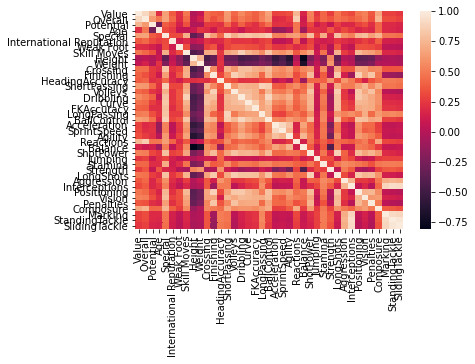

In [ ]:
Xdf = pd.DataFrame(X)
corr_mat  = df.corr(method = 'spearman')
corr_mat.shape
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns)
value_corr = corr_mat.iloc[:, 0]
value_corr

# ***`Based on above Spearman Correlation matrix the selected features are `***

In [ ]:
features = ['Special' , 'BallControl' , "Overall", "Potential", "Reactions", "Composure", 'ShortPassing']

Xnew = df.loc[:, features]
#Xnew_scaled = StandardScaler().fit_transform(X)

In [ ]:
np.random.seed(1)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

fifa_dataset_features = train_set.loc[:, features]
fifa_dataset_labels = train_set.loc[:, 'Value']
#fifa_dataset_labels

1333      4800000.0
15306      300000.0
509      10000000.0
3410      4300000.0
10217      575000.0
            ...    
11284      575000.0
11964      675000.0
5390      2400000.0
860       9500000.0
15843      260000.0
Name: Value, Length: 14527, dtype: float64

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(fifa_dataset_features, fifa_dataset_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
fifa_dataset_predictions = lin_reg.predict(fifa_dataset_features)
lin_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4197198.152207194

In [ ]:
score = r2_score(fifa_dataset_labels, fifa_dataset_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 44.20 %


In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(fifa_dataset_features, fifa_dataset_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
fifa_dataset_predictions = tree_reg.predict(fifa_dataset_features)
tree_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
tree_rmse = np.sqrt(tree_mse)
print('Training RMSE', tree_rmse)


Training RMSE 0.0


In [ ]:
score = r2_score(fifa_dataset_labels, fifa_dataset_predictions)  
print('Training Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 100.00 %


In [ ]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(fifa_dataset_features, fifa_dataset_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
fifa_dataset_predictions = forest_reg.predict(fifa_dataset_features)
forest_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

433690.9959282443

In [ ]:
score = r2_score(fifa_dataset_labels, fifa_dataset_predictions)  
print('Traingn Accuracy:',format(score*100,'.2f'),'%')

Traingn Accuracy: 99.40 %


In [ ]:
scores = cross_val_score(tree_reg, fifa_dataset_features, fifa_dataset_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2135749.04538406 1268110.06283058 1236961.48960758 1648308.56598491
 1994576.58504586 1750494.31127101 1830169.46909732 1530974.20774923
 1199460.12735207 1519928.93596565]
Mean: 1611473.2800288263
Standard deviation: 305437.0008073211


In [ ]:
lin_scores = cross_val_score(lin_reg, fifa_dataset_features, fifa_dataset_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5139208.2800409  3145280.0733812  4011629.876628   4289273.32750454
 4461300.03491738 3731257.14032766 4626279.91545736 3941525.29284553
 4486846.97560464 3842923.29573896]
Mean: 4167552.421244616
Standard deviation: 526666.6090667051


In [ ]:
forest_scores = cross_val_score(forest_reg, fifa_dataset_features, fifa_dataset_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1375848.2195666   967943.85820011  898728.65830159 1305853.34084759
 1424807.37770525 1065253.68005463 1479516.62333573 1189609.93657516
  884544.62660936 1104943.94227018]
Mean: 1169705.0263466216
Standard deviation: 208097.16882822657


# **GRID search for best model and parameters, Since Random forest if giving us satisfactory validation scores, we will fine tune our model using RandomForestRegressor**

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(fifa_dataset_features, fifa_dataset_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

# **Evaluation of  the model on the Test Set**

In [ ]:
fifa_dataset_features = test_set.loc[:, features]
fifa_dataset_labels = test_set.loc[:, "Value"]
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(fifa_dataset_features)

final_mse = mean_squared_error(fifa_dataset_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1167580.028581133

# Note that the final Test RMSE Value is of the range of 1 Million, Which makes the model extremely good since player values range from 1 million to 150Mil

In [ ]:
final_model_score = r2_score(fifa_dataset_labels, final_predictions)  
print('Accuracy:',format(final_model_score*100,'.2f'),'%')

Accuracy: 95.54 %


## **Thus this model can potentially predict Player wages with Test R2 score of 95% and with a fairly low Test RMSE Value**